# SIMPLE  LINEAR REGRESSION

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd

In [6]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as pt

In [8]:
%matplotlib inline

In [9]:
car_crashes=sns.load_dataset('car_crashes')

In [10]:
car_crashes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


In [55]:
newdataset=car_crashes.drop(['not_distracted','no_previous','ins_premium','ins_losses','abbrev'],axis=1)

In [56]:
newdataset

,total,speeding,alcohol
0,18.8,7.332,5.640
1,18.1,7.421,4.525
2,18.6,6.510,5.208
3,22.4,4.032,5.824
4,12.0,4.200,3.360
5,13.6,5.032,3.808
6,10.8,4.968,3.888
7,16.2,6.156,4.860
8,5.9,2.006,1.593
9,17.9,3.759,5.191


In [57]:
x=newdataset.iloc[:,0].values.reshape(-1,1)
y=newdataset.iloc[:,1].values.reshape(-1,1)

In [58]:
x

array([[18.8],
       [18.1],
       [18.6],
       [22.4],
       [12. ],
       [13.6],
       [10.8],
       [16.2],
       [ 5.9],
       [17.9],
       [15.6],
       [17.5],
       [15.3],
       [12.8],
       [14.5],
       [15.7],
       [17.8],
       [21.4],
       [20.5],
       [15.1],
       [12.5],
       [ 8.2],
       [14.1],
       [ 9.6],
       [17.6],
       [16.1],
       [21.4],
       [14.9],
       [14.7],
       [11.6],
       [11.2],
       [18.4],
       [12.3],
       [16.8],
       [23.9],
       [14.1],
       [19.9],
       [12.8],
       [18.2],
       [11.1],
       [23.9],
       [19.4],
       [19.5],
       [19.4],
       [11.3],
       [13.6],
       [12.7],
       [10.6],
       [23.8],
       [13.8],
       [17.4]])

In [59]:
y

array([[7.332],
       [7.421],
       [6.51 ],
       [4.032],
       [4.2  ],
       [5.032],
       [4.968],
       [6.156],
       [2.006],
       [3.759],
       [2.964],
       [9.45 ],
       [5.508],
       [4.608],
       [3.625],
       [2.669],
       [4.806],
       [4.066],
       [7.175],
       [5.738],
       [4.25 ],
       [1.886],
       [3.384],
       [2.208],
       [2.64 ],
       [6.923],
       [8.346],
       [1.937],
       [5.439],
       [4.06 ],
       [1.792],
       [3.496],
       [3.936],
       [6.552],
       [5.497],
       [3.948],
       [6.368],
       [4.224],
       [9.1  ],
       [3.774],
       [9.082],
       [6.014],
       [4.095],
       [7.76 ],
       [4.859],
       [4.08 ],
       [2.413],
       [4.452],
       [8.092],
       [4.968],
       [7.308]])

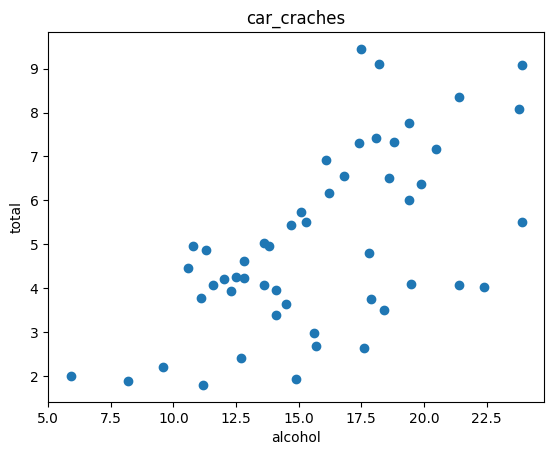

In [60]:
pt.scatter(x,y)
pt.xlabel('alcohol')
pt.ylabel('total')
pt.title('car_craches')
pt.show()

In [64]:
carc=newdataset.to_csv("C:\\Users\\aedpu\\OneDrive\\car_crashes1.csv")

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)

In [67]:
x_test.shape

(11, 1)

In [68]:
x_train.shape

(40, 1)

In [69]:
y_train

array([[6.014],
       [1.937],
       [3.948],
       [5.497],
       [6.156],
       [3.625],
       [2.413],
       [7.175],
       [8.092],
       [4.095],
       [2.669],
       [3.496],
       [1.792],
       [4.806],
       [7.76 ],
       [4.25 ],
       [7.308],
       [2.006],
       [4.608],
       [6.923],
       [5.032],
       [4.066],
       [4.224],
       [9.082],
       [7.421],
       [5.508],
       [9.1  ],
       [2.64 ],
       [4.968],
       [2.208],
       [6.368],
       [1.886],
       [5.738],
       [3.759],
       [3.774],
       [4.968],
       [4.032],
       [7.332],
       [4.452],
       [4.859]])

In [70]:
y_test

array([[4.06 ],
       [9.45 ],
       [2.964],
       [3.384],
       [6.51 ],
       [5.439],
       [4.08 ],
       [3.936],
       [8.346],
       [4.2  ],
       [6.552]])

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
ca=LinearRegression()

In [73]:
ca.fit(x_train,y_train)

LinearRegression()

In [74]:
y_predict=ca.predict(x_test)

In [75]:
y_predict

array([[3.70730109],
       [5.33295241],
       [4.80943758],
       [4.39613639],
       [5.63603994],
       [4.56145687],
       [4.25836933],
       [3.90017497],
       [6.40753548],
       [3.81751474],
       [5.14007852]])

In [76]:
cc=pd.DataFrame(x_test,columns=['speeding'])

In [77]:
cc

,speeding
0,11.6
1,17.5
2,15.6
3,14.1
4,18.6
5,14.7
6,13.6
7,12.3
8,21.4
9,12.0


In [78]:
cc['alcohol']=y_test

In [79]:
cc

,speeding,alcohol
0,11.6,4.060
1,17.5,9.450
2,15.6,2.964
3,14.1,3.384
4,18.6,6.510
5,14.7,5.439
6,13.6,4.080
7,12.3,3.936
8,21.4,8.346
9,12.0,4.200


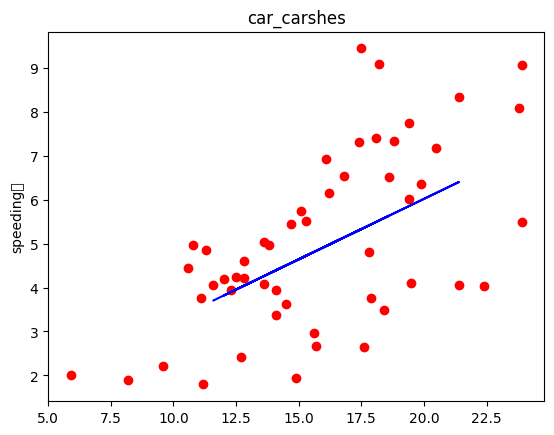

In [80]:
pt.scatter(x,y,color='red')
pt.plot(x_test,y_predict,color='blue')
pt.ylabel('speeding	')
pt.title('car_carshes')
pt.show()

In [81]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [82]:
mean_squared_error(y_test,y_predict)

2.633544223763625

In [83]:
mean_absolute_error(y_test,y_predict)

1.1841717533340164